<a href="https://colab.research.google.com/github/arkalim/PyTorch/blob/master/Prediction_on_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Image

In [0]:
from PIL import Image
import matplotlib.pyplot as plt

!wget https://turntable.kagiso.io/images/Screen_Shot_2019-05-20_at_7.49.14_AM.width-800.png

image = Image.open("Screen_Shot_2019-05-20_at_7.49.14_AM.width-800.png")
plt.imshow(image)

### Apply transforms

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


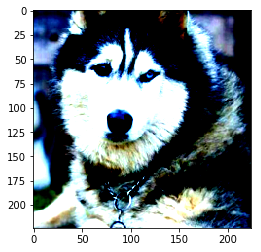

In [2]:
from torchvision import transforms

transform = transforms.Compose([            
     transforms.Resize(256),                    
     transforms.CenterCrop(224),                
     transforms.ToTensor(),                     
     transforms.Normalize(                      
     mean=[0.485, 0.456, 0.406],                
     std=[0.229, 0.224, 0.225]                  
 )])

image = transform(image)

print(image.shape)
plt.imshow(image.numpy().transpose(1,2,0))

# adding batch value of 1
image = image.unsqueeze(dim = 0)
print(image.shape)

### Download the Imagenet classes Text file

In [3]:
!wget https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/archive/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5.zip
!unzip '238f720ff059c1f82f368259d1ca4ffa5dd8f9f5.zip'    

# this way of reading lines appends the lines in a list
with open('942d3a0ac09ec9e5eb3a-238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt',encoding = "ISO-8859-1") as f:
    classes = [line.strip() for line in f.readlines()]    
    
print(len(classes))

# Print all the Class Names
for class_name in classes:
    print(class_name)

--2019-06-22 14:27:16--  https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/archive/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5.zip
Resolving gist.github.com (gist.github.com)... 192.30.253.118
Connecting to gist.github.com (gist.github.com)|192.30.253.118|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/gist/942d3a0ac09ec9e5eb3a/zip/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5 [following]
--2019-06-22 14:27:16--  https://codeload.github.com/gist/942d3a0ac09ec9e5eb3a/zip/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘238f720ff059c1f82f368259d1ca4ffa5dd8f9f5.zip’

238f720ff059c1f82f3     [ <=>                ]  13.17K  --.-KB/s    in 0.01s   

2019-06-22 14:27:16 (1.31 MB/s) - ‘238f720ff05

### Download Resnet 50 and predict the image

In [18]:
import torch
import torchvision
from torchvision import models

resnet = models.inception_v3(pretrained=True)

# set the model to evaluation mode
resnet.eval()

prediction = resnet(image)

print(prediction.shape)

# select the only image batch = 0
percentage = torch.nn.functional.softmax(prediction, dim = 1)[0] * 100

# sort the predictions 
values , indices = torch.sort(percentage, descending=True)

# Print top 5 predictions
for index in indices[:5]:
    print(classes[index],percentage[index].item())

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 56335953.19it/s]


torch.Size([1, 1000])
248: 'Eskimo dog, husky', 85.45954132080078
250: 'Siberian husky', 14.520523071289062
249: 'malamute, malemute, Alaskan malamute', 0.01904020644724369
537: 'dogsled, dog sled, dog sleigh', 0.0003802889259532094
270: 'white wolf, Arctic wolf, Canis lupus tundrarum', 6.109521200414747e-05
